# References:

1. Easwar Magesan, J. M. Gambetta, and Joseph Emerson, Robust randomized benchmarking of quantum processes, https://arxiv.org/pdf/1009.3639


2. Easwar Magesan, Jay M. Gambetta, and Joseph Emerson, Characterizing Quantum Gates via Randomized Benchmarking, https://arxiv.org/pdf/1109.6887


3. A. D. C'orcoles, Jay M. Gambetta, Jerry M. Chow, John A. Smolin, Matthew Ware, J. D. Strand, B. L. T. Plourde, and M. Steffen, Process verification of two-qubit quantum gates by randomized benchmarking, https://arxiv.org/pdf/1210.7011


4. David C. McKay, Sarah Sheldon, John A. Smolin, Jerry M. Chow, and Jay M. Gambetta, Three Qubit Randomized Benchmarking, https://arxiv.org/pdf/1712.06550

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from qutip import basis, sigmax, sigmay, sigmaz, qeye, Bloch
from functools import reduce
from qutip import fidelity
from scipy.optimize import curve_fit

# Randomized Benchmarking with simple Gates for 1 qubit: 

In [2]:
initial_state = basis(2, 0)

In [3]:
X = sigmax()
Y = sigmay()
Z = sigmaz()

clifford_gates = {"X": X,"Y": Y,"Z": Z}
gate_colors = {"X": "royalblue", "Y": "gold", "Z": "tomato"}

In [4]:
sequence_lengths = range(1, 101, 10)

In [5]:
def generate_random_clifford_sequences(gate_set, lengths):
    sequences = {}
    for length in lengths:
        sequence = [random.choice(list(gate_set.values())) for _ in range(length)]
        sequences[length] = sequence
    return sequences

In [6]:
random_sequences = generate_random_clifford_sequences(clifford_gates, sequence_lengths)

In [7]:
def plot_gate_sequence_layout(sequence, length):
    fig, ax = plt.subplots(figsize=(14, 2))
    ax.set_xlim(0, length)
    ax.set_ylim(-0.5, 0.5)
    
    for i, gate in enumerate(sequence):
        gate_name = list(clifford_gates.keys())[list(clifford_gates.values()).index(gate)]
        color = gate_colors[gate_name]
        ax.add_patch(plt.Rectangle((i, -0.2), 1, 0.4, fill=True, color=color))
        ax.text(i + 0.5, 0, gate_name, ha='center', va='center', fontsize=10, fontweight='bold')

    ax.set_xticks(range(length))
    ax.set_xticklabels([])
    
    ax.set_title(f"Gate Sequence Layout (Length {length})")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
def apply_gate_sequence(initial_state, sequence):
    final_state = initial_state
    for gate in sequence:
        final_state = gate * final_state
    return final_state

In [9]:
def compute_inversion_gate(sequence):
    composite_gate = reduce(lambda x, y: x * y, sequence)
    inversion_gate = composite_gate.inv()
    return inversion_gate


Sequence Length 1:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.+0.j]
 [0.+1.j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.-0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Returned to ground state: True

------------------------------



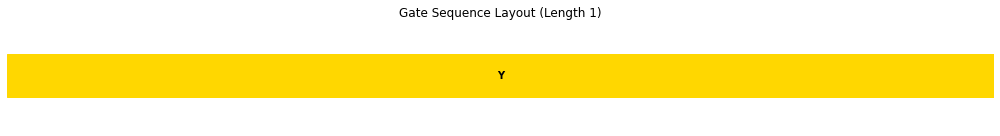


Sequence Length 11:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.-1.j]
 [0.+0.j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.-1.j -0.+0.j]
 [ 0.+0.j  0.-1.j]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-1.]
 [ 0.]]
Returned to ground state: False

------------------------------



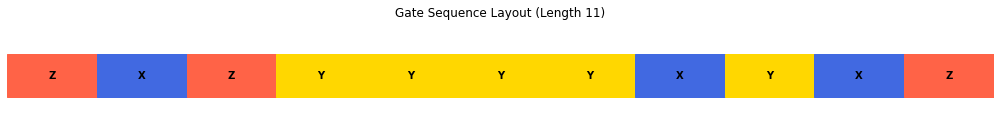


Sequence Length 21:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.-1.j]
 [0.+0.j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.-1.j -0.+0.j]
 [ 0.+0.j  0.-1.j]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-1.]
 [ 0.]]
Returned to ground state: False

------------------------------



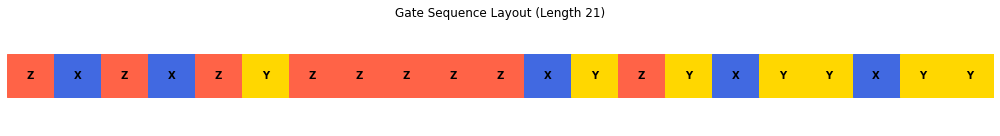


Sequence Length 31:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Returned to ground state: True

------------------------------



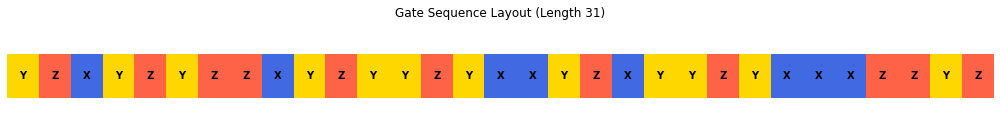


Sequence Length 41:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-1.]
 [ 0.]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1. -0.]
 [ 0.  1.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Returned to ground state: True

------------------------------



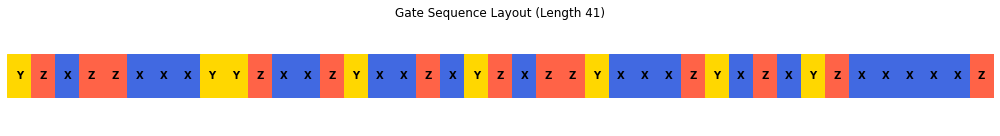


Sequence Length 51:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-1.]
 [ 0.]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1. -0.]
 [ 0.  1.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Returned to ground state: True

------------------------------



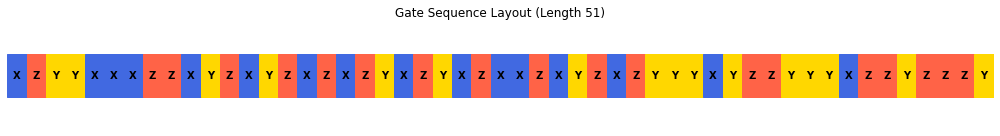


Sequence Length 61:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.-1.j]
 [0.+0.j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.-1.j -0.+0.j]
 [ 0.+0.j  0.-1.j]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-1.]
 [ 0.]]
Returned to ground state: False

------------------------------



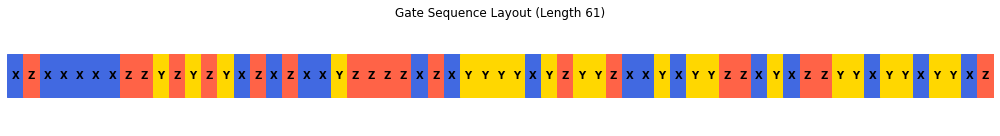


Sequence Length 71:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.]
 [-1.]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0. -1.]
 [-1.  0.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Returned to ground state: True

------------------------------



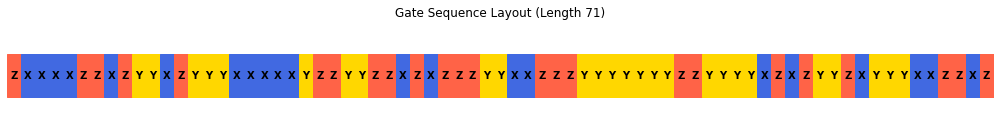


Sequence Length 81:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-0.  1.]
 [ 1.  0.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Returned to ground state: True

------------------------------



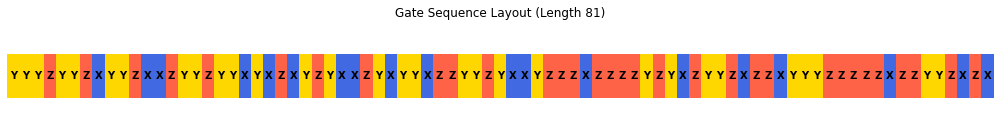


Sequence Length 91:

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Returned to ground state: True

------------------------------



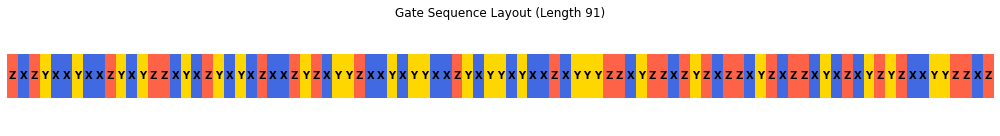

In [10]:
results = {}

for length, sequence in random_sequences.items():
    print(f"\nSequence Length {length}:\n")

    final_state_after_sequence = apply_gate_sequence(initial_state, sequence)
    inversion_gate = compute_inversion_gate(sequence)
    final_state_after_inversion = inversion_gate * final_state_after_sequence
    
    results[length] = {"Sequence": sequence,
                       "Final_state_after_sequence": final_state_after_sequence,
                       "Inversion_gate": inversion_gate,
                       "Final_state_after_inversion": final_state_after_inversion}
    
    returned_to_ground_state = np.allclose(final_state_after_inversion.full(), initial_state.full())
    
    print("Final state after sequence (before inversion):")
    print(final_state_after_sequence)
    
    print("\nInversion gate:")
    print(inversion_gate)
    
    print("\nFinal state after applying inversion gate:")
    print(final_state_after_inversion)
    
    print("Returned to ground state:", returned_to_ground_state)
    print("\n" + "-"*30 + "\n")
    
    plot_gate_sequence_layout(sequence, length)

# Depolarizing Error

The depolarizing error is defined as:

$$ E(\rho) = (1 - \lambda) \rho + \lambda \, \text{Tr}[\rho] \cdot \frac{I}{2^n} $$

where:
- **λ** is the depolarizing error parameter (with $( 0 \leq \lambda \leq 1))$ .
- **n** is the number of qubits.
- **I** is the identity matrix.
- **ρ** is the density matrix of the system.

https://docs.quantum.ibm.com/api/qiskit/0.19/qiskit.providers.aer.noise.depolarizing_error

In [11]:
def depolarizing_error(gate, param=0.01, num_qubits=1, standard_gates=True):
    lambda_ = param / (4**num_qubits - 1)
    identity = qeye(2**num_qubits)
    pauli_channels = (sigmax() + sigmay() + sigmaz()) / 3
    noise_channel = (1 - lambda_) * identity + lambda_ * pauli_channels
    noisy_gate = noise_channel * gate
    
    return noisy_gate

In [12]:
def apply_gate_sequence_with_noise(initial_state, sequence, p=0.01):
    final_state = initial_state
    for gate in sequence:
        noisy_gate = depolarizing_error(gate, param=0.01, num_qubits=1, standard_gates=True)
        final_state = noisy_gate * final_state
    return final_state


Sequence Length 1 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.00111111+0.00111111j]
 [0.        +0.99555556j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.-0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.99555556+0.j        ]
 [-0.00111111+0.00111111j]]
Returned to ground state: False

------------------------------



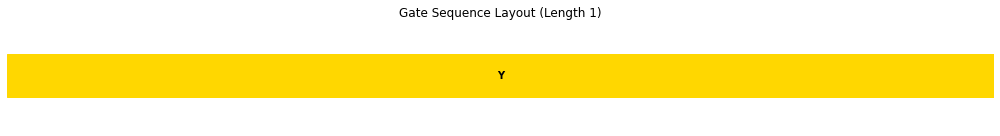


Sequence Length 11 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-9.60551227e-06-0.96499982j]
 [-3.21425675e-03+0.00107458j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.-1.j -0.+0.j]
 [ 0.+0.j  0.-1.j]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.96499982+9.60551227e-06j]
 [ 0.00107458+3.21425675e-03j]]
Returned to ground state: False

------------------------------



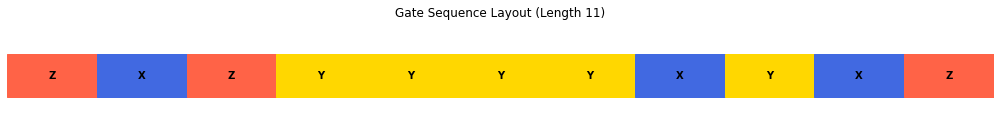


Sequence Length 21 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-9.25893828e-06-0.92706737j]
 [-1.05785171e-03-0.0010208j ]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.-1.j -0.+0.j]
 [ 0.+0.j  0.-1.j]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.92706737+9.25893828e-06j]
 [-0.0010208 +1.05785171e-03j]]
Returned to ground state: False

------------------------------



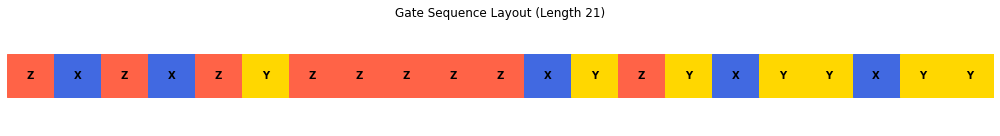


Sequence Length 31 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.90265684+5.24183037e-09j]
 [0.00705857-3.02446205e-03j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.90265684+5.24183037e-09j]
 [-0.00705857+3.02446205e-03j]]
Returned to ground state: False

------------------------------



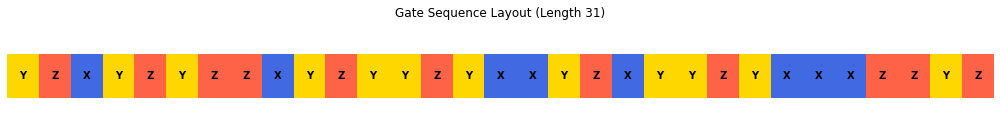


Sequence Length 41 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.86910199-1.28262530e-05j]
 [ 0.00289497-4.86502781e-03j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1. -0.]
 [ 0.  1.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.86910199+1.28262530e-05j]
 [0.00289497-4.86502781e-03j]]
Returned to ground state: False

------------------------------



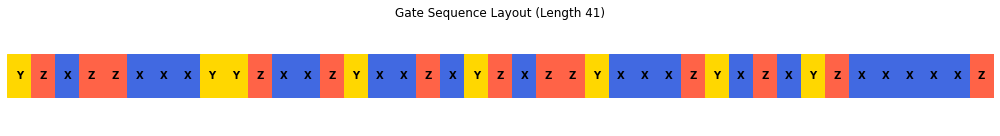


Sequence Length 51 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.84995347+4.12229747e-06j]
 [-0.00089416-9.86184228e-04j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1. -0.]
 [ 0.  1.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.84995347-4.12229747e-06j]
 [-0.00089416-9.86184228e-04j]]
Returned to ground state: False

------------------------------



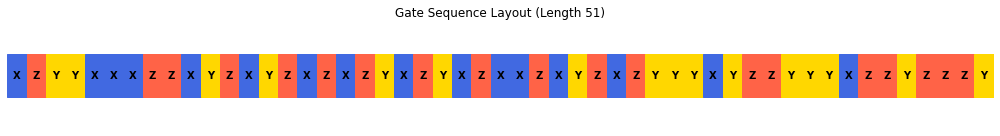


Sequence Length 61 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[3.86124654e-06-0.82205183j]
 [4.57081102e-03+0.00453055j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.-1.j -0.+0.j]
 [ 0.+0.j  0.-1.j]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.82205183-3.86124654e-06j]
 [ 0.00453055-4.57081102e-03j]]
Returned to ground state: False

------------------------------



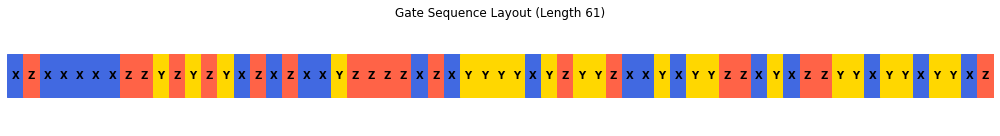


Sequence Length 71 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.00261189+1.48615485e-02j]
 [-0.78634975+4.66824224e-05j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0. -1.]
 [-1.  0.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.78634975-4.66824224e-05j]
 [-0.00261189-1.48615485e-02j]]
Returned to ground state: False

------------------------------



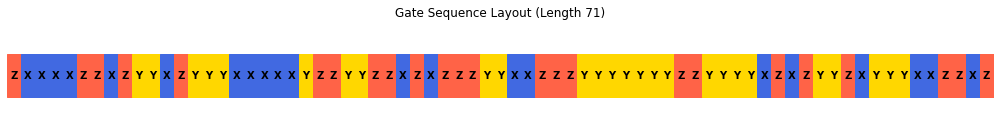


Sequence Length 81 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.00083541-5.93100705e-03j]
 [ 0.76209366-7.48470057e-06j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-0.  1.]
 [ 1.  0.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.76209366-7.48470057e-06j]
 [-0.00083541-5.93100705e-03j]]
Returned to ground state: False

------------------------------



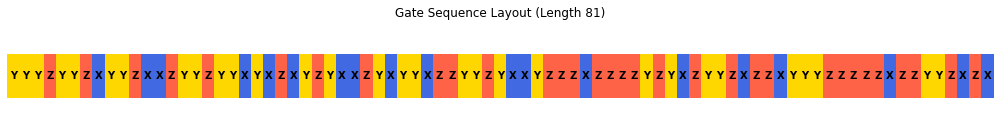


Sequence Length 91 (with noise):

Final state after sequence (before inversion):
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.73212979+3.67564209e-06j]
 [-0.00407265+8.08054819e-04j]]

Inversion gate:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Final state after applying inversion gate:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.73212979+3.67564209e-06j]
 [0.00407265-8.08054819e-04j]]
Returned to ground state: False

------------------------------



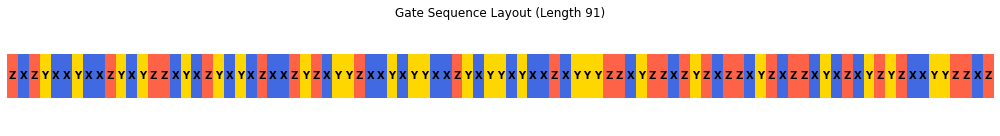

In [13]:
results_with_noise = {}

for length, sequence in random_sequences.items():
    print(f"\nSequence Length {length} (with noise):\n")

    final_state_after_sequence = apply_gate_sequence_with_noise(initial_state, sequence, p=0.01)
    inversion_gate = compute_inversion_gate(sequence)
    final_state_after_inversion = inversion_gate * final_state_after_sequence

    results_with_noise[length] = {"Sequence": sequence,
                                  "Final_state_after_sequence": final_state_after_sequence,
                                  "Inversion_gate": inversion_gate,
                                  "Final_state_after_inversion": final_state_after_inversion}

    returned_to_ground_state = np.allclose(final_state_after_inversion.full(), initial_state.full())
    
    print("Final state after sequence (before inversion):")
    print(final_state_after_sequence)
    
    print("\nInversion gate:")
    print(inversion_gate)
    
    print("\nFinal state after applying inversion gate:")
    print(final_state_after_inversion)
    
    print("Returned to ground state:", returned_to_ground_state)
    print("\n" + "-"*30 + "\n")
    
    plot_gate_sequence_layout(sequence, length)

In [14]:
def run_repetitions(sequence, initial_state, num_reps=100, noise_prob=0.01):
    fidelities = []
    
    for _ in range(num_reps):
        final_state_after_sequence = apply_gate_sequence_with_noise(initial_state, sequence, p=noise_prob)
        inversion_gate = compute_inversion_gate(sequence)
        final_state_after_inversion = inversion_gate * final_state_after_sequence
        
        fidelity_val = fidelity(final_state_after_inversion, initial_state)
        fidelities.append(fidelity_val)
    
    return fidelities

In [15]:
fidelity_results = {}

for length, sequence in random_sequences.items():
    print(f"\nSequence Length {length} (with noise, multiple repetitions):\n")
    
    fidelities = run_repetitions(sequence, initial_state, num_reps=100, noise_prob=0.01)
    
    mean_fidelity = np.mean(fidelities)
    std_fidelity = np.std(fidelities)
    
    fidelity_results[length] = {"Mean Fidelity": mean_fidelity,
                                "Standard Deviation": std_fidelity,
                                "Fidelities": fidelities}
    
    print(f"Mean Fidelity: {mean_fidelity}")
    print(f"Standard Deviation: {std_fidelity}")
    print("\n" + "-"*30 + "\n")


Sequence Length 1 (with noise, multiple repetitions):

Mean Fidelity: 0.9955555555555554
Standard Deviation: 2.220446049250313e-16

------------------------------


Sequence Length 11 (with noise, multiple repetitions):

Mean Fidelity: 0.9649998164307018
Standard Deviation: 1.1102230246251565e-16

------------------------------


Sequence Length 21 (with noise, multiple repetitions):

Mean Fidelity: 0.9270673721727026
Standard Deviation: 0.0

------------------------------


Sequence Length 31 (with noise, multiple repetitions):

Mean Fidelity: 0.9026568371795872
Standard Deviation: 0.0

------------------------------


Sequence Length 41 (with noise, multiple repetitions):

Mean Fidelity: 0.8691019897774168
Standard Deviation: 1.1102230246251565e-16

------------------------------


Sequence Length 51 (with noise, multiple repetitions):

Mean Fidelity: 0.8499534667981886
Standard Deviation: 4.440892098500626e-16

------------------------------


Sequence Length 61 (with noise, multip

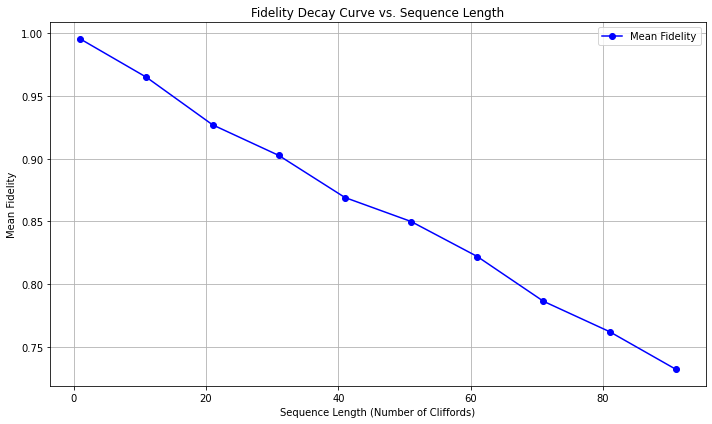

In [16]:
sequence_lengths = list(fidelity_results.keys())
mean_fidelities = [fidelity_results[length]["Mean Fidelity"] for length in sequence_lengths]

plt.figure(figsize=(10, 6))
plt.plot(sequence_lengths, mean_fidelities, marker='o', color='b', linestyle='-', label='Mean Fidelity')
plt.xlabel("Sequence Length (Number of Cliffords)")
plt.ylabel("Mean Fidelity")
plt.title("Fidelity Decay Curve vs. Sequence Length")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
def exp_decay(x, A, lambda_, B):
    return A * np.exp(-lambda_ * x) + B

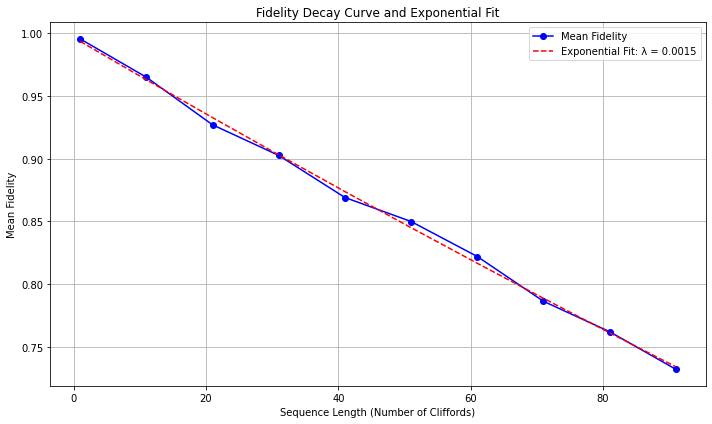

Fitted Parameters:
λ (Decay rate): 0.0015


In [18]:
sequence_lengths = list(fidelity_results.keys())
mean_fidelities = [fidelity_results[length]["Mean Fidelity"] for length in sequence_lengths]

params, covariance = curve_fit(exp_decay, sequence_lengths, mean_fidelities, p0=[1, 0.1, 0])

A, lambda_, B = params

fitted_fidelities = exp_decay(np.array(sequence_lengths), A, lambda_, B)

plt.figure(figsize=(10, 6))
plt.plot(sequence_lengths, mean_fidelities, marker='o', color='b', linestyle='-', label='Mean Fidelity')
plt.plot(sequence_lengths, fitted_fidelities, color='r', linestyle='--', label=f"Exponential Fit: λ = {lambda_:.4f}")
plt.xlabel("Sequence Length (Number of Cliffords)")
plt.ylabel("Mean Fidelity")
plt.title("Fidelity Decay Curve and Exponential Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Fitted Parameters:")
print(f"λ (Decay rate): {lambda_:.4f}")

# Noise strength values


Noise Probability: 0.01

Sequence Length 1 (with noise 0.01):

Mean Fidelity: 0.9866666666666665
Standard Deviation: 2.220446049250313e-16

------------------------------

Sequence Length 11 (with noise 0.01):

Mean Fidelity: 0.8982411113401996
Standard Deviation: 1.1102230246251565e-16

------------------------------

Sequence Length 21 (with noise 0.01):

Mean Fidelity: 0.7959333964741294
Standard Deviation: 0.0

------------------------------

Sequence Length 31 (with noise 0.01):

Mean Fidelity: 0.7346281921853648
Standard Deviation: 1.1102230246251565e-16

------------------------------

Sequence Length 41 (with noise 0.01):

Mean Fidelity: 0.6552943343257996
Standard Deviation: 0.0

------------------------------

Sequence Length 51 (with noise 0.01):

Mean Fidelity: 0.6127213356084712
Standard Deviation: 1.1102230246251565e-16

------------------------------

Sequence Length 61 (with noise 0.01):

Mean Fidelity: 0.5541858166455781
Standard Deviation: 1.1102230246251565e-16

---

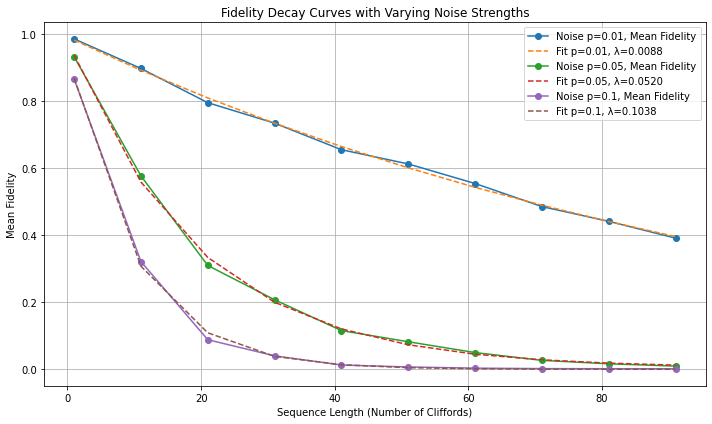


Noise Probability: 0.01
λ (Decay rate): 0.008761169775872062

Noise Probability: 0.05
λ (Decay rate): 0.051971619944345175

Noise Probability: 0.1
λ (Decay rate): 0.10381933115769162


In [19]:
def depolarizing_noise(gate, p=0.01):
    noise_channel = (1 - p) * qeye(2) + (p / 3) * (sigmax() + sigmay() + sigmaz())  # p: the probability of noise
    noisy_gate = noise_channel * gate
    return noisy_gate

def apply_gate_sequence_with_noise(initial_state, sequence, p=0.01):
    final_state = initial_state
    for gate in sequence:
        noisy_gate = depolarizing_noise(gate, p)
        final_state = noisy_gate * final_state
    return final_state

def run_repetitions(sequence, initial_state, num_reps=100, noise_prob=0.01):
    fidelities = []
    for _ in range(num_reps):
        final_state_after_sequence = apply_gate_sequence_with_noise(initial_state, sequence, p=noise_prob)
        inversion_gate = compute_inversion_gate(sequence)
        final_state_after_inversion = inversion_gate * final_state_after_sequence
        fidelity_val = fidelity(final_state_after_inversion, initial_state)
        fidelities.append(fidelity_val)
    return fidelities

noise_levels = [0.01, 0.05, 0.1] 
fidelity_results_by_noise = {}

for noise_prob in noise_levels:
    print(f"\nNoise Probability: {noise_prob}\n")
    fidelity_results = {}
    
    for length, sequence in random_sequences.items():
        print(f"Sequence Length {length} (with noise {noise_prob}):\n")
        
        fidelities = run_repetitions(sequence, initial_state, num_reps=100, noise_prob=noise_prob)
        
        mean_fidelity = np.mean(fidelities)
        std_fidelity = np.std(fidelities)
        
        fidelity_results[length] = {"Mean Fidelity": mean_fidelity,
                                    "Standard Deviation": std_fidelity,
                                    "Fidelities": fidelities}
        
        print(f"Mean Fidelity: {mean_fidelity}")
        print(f"Standard Deviation: {std_fidelity}")
        print("\n" + "-"*30 + "\n")
    
    fidelity_results_by_noise[noise_prob] = fidelity_results

plt.figure(figsize=(10, 6))

for noise_prob, fidelity_results in fidelity_results_by_noise.items():
    sequence_lengths = list(fidelity_results.keys())
    mean_fidelities = [fidelity_results[length]["Mean Fidelity"] for length in sequence_lengths]
    
    params, covariance = curve_fit(exp_decay, sequence_lengths, mean_fidelities, p0=[1, 0.1, 0])
    A, lambda_, B = params
    fitted_fidelities = exp_decay(np.array(sequence_lengths), A, lambda_, B)
    
    plt.plot(sequence_lengths, mean_fidelities, marker='o', label=f'Noise p={noise_prob}, Mean Fidelity')
    plt.plot(sequence_lengths, fitted_fidelities, linestyle='--', label=f'Fit p={noise_prob}, λ={lambda_:.4f}')

plt.xlabel("Sequence Length (Number of Cliffords)")
plt.ylabel("Mean Fidelity")
plt.title("Fidelity Decay Curves with Varying Noise Strengths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

for noise_prob, fidelity_results in fidelity_results_by_noise.items():
    sequence_lengths = list(fidelity_results.keys())
    mean_fidelities = [fidelity_results[length]["Mean Fidelity"] for length in sequence_lengths]
    
    params, covariance = curve_fit(exp_decay, sequence_lengths, mean_fidelities, p0=[1, 0.1, 0])
    A, lambda_, B = params
    
    print(f"\nNoise Probability: {noise_prob}")
    print(f"λ (Decay rate): {lambda_}")

# Interleaved Randomized Benchmarking (IRB)

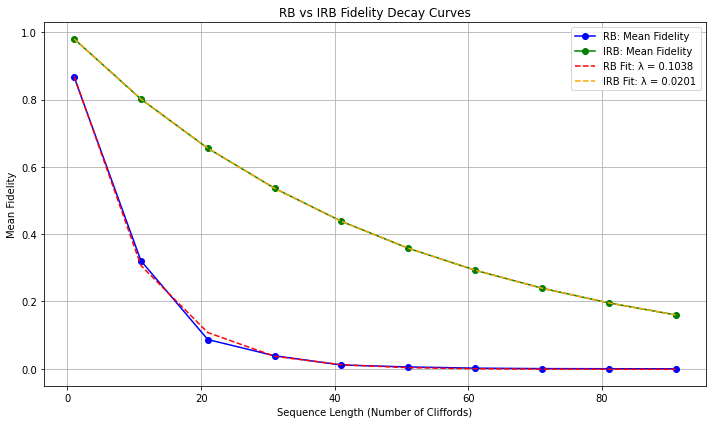

RB Fit Parameters:
λ (Decay rate): 0.10381933115769162
IRB Fit Parameters:
λ (Decay rate): 0.020111833951619962


In [20]:
special_gate = clifford_gates["X"]

def generate_irb_sequence(sequence, special_gate, insert_position=None):
    if insert_position is not None:
        sequence.insert(insert_position, special_gate)
    else:
        sequence = [gate for sublist in zip(sequence, [special_gate]*len(sequence)) for gate in sublist]
    return sequence

irb_sequences = {}
for length, sequence in random_sequences.items():
    irb_sequences[length] = generate_irb_sequence(sequence.copy(), special_gate)

irb_fidelity_results = {}
for length, sequence in irb_sequences.items():
    fidelities = run_repetitions(sequence, initial_state, num_reps=100, noise_prob=0.01)
    mean_fidelity = np.mean(fidelities)
    std_fidelity = np.std(fidelities)
    irb_fidelity_results[length] = {"Mean Fidelity": mean_fidelity,
                                    "Standard Deviation": std_fidelity,
                                    "Fidelities": fidelities}

irb_mean_fidelities = [irb_fidelity_results[length]["Mean Fidelity"] for length in sequence_lengths]
irb_params, _ = curve_fit(exp_decay, sequence_lengths, irb_mean_fidelities, p0=[1, 0.1, 0])
irb_fitted_fidelities = exp_decay(np.array(sequence_lengths), *irb_params)

plt.figure(figsize=(10, 6))
plt.plot(sequence_lengths, mean_fidelities, marker='o', color='b', linestyle='-', label='RB: Mean Fidelity')
plt.plot(sequence_lengths, irb_mean_fidelities, marker='o', color='g', linestyle='-', label='IRB: Mean Fidelity')
plt.plot(sequence_lengths, fitted_fidelities, color='r', linestyle='--', label=f"RB Fit: λ = {lambda_:.4f}")
plt.plot(sequence_lengths, irb_fitted_fidelities, color='orange', linestyle='--', 
         label=f"IRB Fit: λ = {irb_params[1]:.4f}")
plt.xlabel("Sequence Length (Number of Cliffords)")
plt.ylabel("Mean Fidelity")
plt.title("RB vs IRB Fidelity Decay Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("RB Fit Parameters:")
print(f"λ (Decay rate): {lambda_}")

print("IRB Fit Parameters:")
print(f"λ (Decay rate): {irb_params[1]}")